In [2]:
import autoencodeSVJ.utils as utils
# import autoencode.trainer as trainer
import autoencodeSVJ.evaluate as ev

Using TensorFlow backend.


In [3]:
import glob
import numpy as np

signal_dir = 'data/all_signals'
signals = glob.glob('{}/*'.format(signal_dir))
dim = 7
for i in range(100):
    mu, sigma = 0.002, 0.95
    lr = np.random.lognormal(np.log(mu), sigma)
    print 'target_dim {}, lr {}:'.format(dim, lr),
    auc = ev.ae_train(
        signal_path='data/all_signals/3000GeV_0.30/base_3/*.h5',
        qcd_path='data/background/base_3/*.h5',
        target_dim=dim,
        verbose=False,
        batch_size=32,
        learning_rate=lr,
    )
    print auc

target_dim 7, lr 0.00390093971898: training under filename 'hlf_eflow3_7_v160'
0.85735291109
target_dim 7, lr 0.0444290205142: training under filename 'hlf_eflow3_7_v161'
0.760918632768
target_dim 7, lr 0.000701048068148: training under filename 'hlf_eflow3_7_v162'
0.808148821521
target_dim 7, lr 0.00767302907486: training under filename 'hlf_eflow3_7_v163'
0.801318829374
target_dim 7, lr 0.000310696303359: training under filename 'hlf_eflow3_7_v164'
0.87402964351
target_dim 7, lr 0.000975347042202: training under filename 'hlf_eflow3_7_v165'
0.786768618025
target_dim 7, lr 0.00133104939126: training under filename 'hlf_eflow3_7_v166'
0.794897389601
target_dim 7, lr 0.000659081400903: training under filename 'hlf_eflow3_7_v167'
0.820278836651
target_dim 7, lr 0.00479595716619: training under filename 'hlf_eflow3_7_v168'


KeyboardInterrupt: 

In [6]:
data, jets, event, flavor = utils.load_all_data("data/background/base_3/*.h5", name='QCD')

In [49]:
import energyflow as ef

help(ef.datasets.qg_jets.load)

Help on function load in module energyflow.datasets.qg_jets:

load(num_data=100000, generator='pythia', pad=True, with_bc=False, cache_dir='~/.energyflow')
    Loads samples from the dataset (which in total is contained in twenty 
    files). Any file that is needed that has not been cached will be 
    automatically downloaded. Downloading a file causes it to be cached for
    later use. Basic checksums are performed.
    
    **Arguments**
    
    - **num_data** : _int_
        - The number of events to return. A value of `-1` means read in all
        events.
    - **generator** : _str_
        - Specifies which Monte Carlo generator the events should come from.
        Currently, the options are `'pythia'` and `'herwig'`.
    - **pad** : _bool_
        - Whether to pad the events with zeros to make them the same length.
        Note that if set to `False`, the returned `X` array will be an object
        array and not a 3-d array of floats.
    - **with_bc** : _bool_
        - Whe

In [36]:
utils.summary().cfilter(['arch', 'filename', 'mae_auc', 'hlf_to_drop']).sort_values('mae_auc')[::-1].head(2)

,arch,filename,hlf_to_drop,mae_auc
131,"[15, 100, 100, 8, 100, 100, 15]",hlf_eflow3_8_v31,"[Axis2, PTD, Energy, Flavor, Eta, Phi]",0.912017
122,"[17, 100, 100, 8, 100, 100, 17]",hlf_eflow3_8_v24,"[Axis2, PTD, Energy, Flavor]",0.905551


In [38]:
elt = ev.ae_evaluation("hlf_eflow3_8_v31")

found 1 matches with search '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/autoencode/data/summary/hlf_eflow3_8_v31.summary'
train_shell :: using saved model


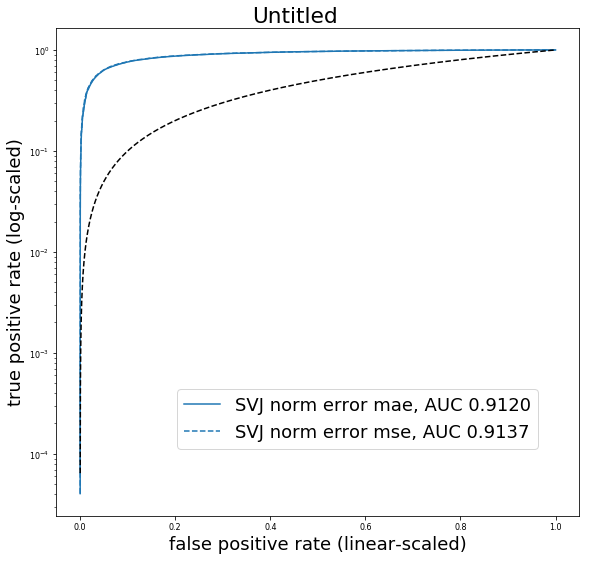

In [42]:
elt.roc(yscale='log')

In [64]:
%run autoencode/module/autoencodeSVJ/evaluate.py

In [66]:
%run autoencode/module/autoencodeSVJ/utils.py

In [67]:
# def BDT_load_all_data(
#     SVJ_path, QCD_path, 
#     test_split=0.2, random_state=-1,
#     include_hlf=True, include_eflow=True,
#     hlf_to_drop=['Energy', 'Flavor']
# ):
#     """General-purpose data loader for BDT training, which separates classes and splits data into training/testing data.
    
#     Args: 
#         SVJ_path (str): glob-style specification of .h5 files to load as SVJ signal
#         qcd_path (str): glob-style specification of .h5 files to load as qcd background
#         test_split (float): fraction of total data to use for testing 
#         random_state (int): random seed, leave as -1 for random assignment
#         include_hlf (bool): true to include high-level features in loaded data, false for not
#         include_eflow (bool): true to include energy-flow basis features in loaded data, false for not
#         hlf_to_drop (list(str)): list of high-level features to drop from the final dataset. Defaults to dropping Energy and Flavor.
    
#     Returns:
#         tuple(pandas.DataFrame, pandas.DataFrame): X,Y training data, where X is the data samples for each jet, and Y is the 
#             signal/background tag for each jet
#         tuple(pandas.DataFrame, pandas.DataFrame): X_test,Y_test testing data, where X are data samples for each jet and Y is the
#             signal/background tag for each jet
#     """
#     if random_state < 0:
#         random_state = np.random.randint(0, 2**32 - 1)
#     SVJ,_,_,_ = load_all_data(SVJ_path, "SVJ", include_hlf=include_hlf, include_eflow=include_eflow, hlf_to_drop=hlf_to_drop)
#     QCD,_,_,_ = load_all_data(QCD_path, "QCD", include_hlf=include_hlf, include_eflow=include_eflow, hlf_to_drop=hlf_to_drop)
    
    
#     SVJ_train, SVJ_test = train_test_split(SVJ.df, test_size=test_split, random_state=random_state)
#     QCD_train, QCD_test = train_test_split(QCD.df, test_size=test_split, random_state=random_state)

#     SVJ_Y_train, SVJ_Y_test = map(lambda elt: pd.DataFrame(np.ones((len(elt), 1)), index=elt.index, columns=['Tag']), [SVJ_train, SVJ_test])
#     QCD_Y_train, QCD_Y_test = map(lambda elt: pd.DataFrame(np.ones((len(elt), 1)), index=elt.index, columns=['Tag']), [QCD_train, QCD_test])

#     X = SVJ_train.append(QCD_train)
#     Y = SVJ_Y_train.append(QCD_Y_train)
    
#     X_test = SVJ_test.append(QCD_test)
#     Y_test = SVJ_Y_test.append(QCD_Y_test)
    
#     return (X, Y), (X_test, Y_test)

(X,Y), (X_test,Y_test) = BDT_load_all_data("data/signal/base_3/*.h5", "data/background/base_3/*.h5", random_state=3)
(X_p,Y), (X_test,Y_test) = BDT_load_all_data("data/signal/base_3/*.h5", "data/background/base_3/*.h5", random_state=3)

In [ ]:
ae_train(
    'data/signal/base_3/*.h5',
    'data/background/base_3/*.h5',
    8,
    True,
    True,
    epochs=100,
    interm_architecture=(100,),
    hlf_to_drop=['Energy', 'Flavor', 'Eta', 'Phi']
)

In [46]:
ae_train(
    'data/signal/base_3/*.h5',
    'data/background/base_3/*.h5',
    8,
    True,
    True,
    epochs=100,
    interm_architecture=(12, 10),
    hlf_to_drop=['Axis2', 'PTD', 'Energy', 'Flavor']
)

training under filename 'hlf_eflow3_8_v34'
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (InputLayer)         (None, 17)                0         
_________________________________________________________________
encoder (Model)              (None, 8)                 1328      
_________________________________________________________________
decoder (Model)              (None, 17)                1337      
Total params: 2,665
Trainable params: 2,665
Non-trainable params: 0
_________________________________________________________________
TRAINING WITH PARAMS >>>
epochs : 100
loss : mse
learning_rate : 0.0005
optimizer : adam
batch_size : 64
Train on 74716 samples, validate on 13186 samples
Epoch 1/100
74716/74716 [==============================] - 4s 57us/step - loss: 0.0102 - val_loss: 0.0035
Epoch 2/100
74716/74716 [==============================] - 2s 32us/step - loss: 0.0035 - val_loss: 0

0.84882617562211271

In [3]:
d = utils.data_loader(name="data")
d.add_sample("data/background/constituents_3/data_0_data.h5")

data_loader :: Adding sample at path '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/data/background/constituents_3/data_0_data.h5'


In [7]:
d.data['jet_constituents'].shape

(5647, 2, 100, 5)

In [341]:
import glob
import numpy as np
import ROOT as rt

def consts(globpath):
    files = glob.glob(globpath)
    assert len(files) > 0, "no files in globpath '{}'".format(globpath)
    l = utils.data_loader(name="data") 
    for f in files:
        l.add_sample(f)
    stacked = np.vstack(l.data['jet_constituents'])
    jets = np.vstack(l.data['jet_features'])
    print(l.labels['jet_constituents'])
    
    ret = []
    tab = []
    for i,elt in enumerate(stacked):
        ret.append([])
        tab.append(rt.TLorentzVector())
        tab[i].SetPtEtaPhiE(jets[i][2], jets[i][0], jets[i][1], jets[i][8])
        for j,const in enumerate(elt):
            if const[4] > 0.0:
                ret[i].append(rt.TLorentzVector())
                ret[i][j].SetPtEtaPhiE(const[2], const[0], const[1], const[4])
    
    return ret, tab
8

data, jets = consts("TEST.h5")

data_loader :: Adding sample at path '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/TEST.h5'
['Eta' 'Phi' 'PT' 'Rapidity' 'Energy']


In [420]:
etas_out = []
phis_out = []

zero = rt.TLorentzVector()
zero.SetPtEtaPhiE(1., 0., 0., 1.)


etas, phis = [], []
clean = []
for i,(constituents,jet) in enumerate(zip(data, jets)):    
    clean.append([])
    angle = sum(constituents, rt.TLorentzVector()).Theta()
    for j,c in enumerate(constituents):
        new = rt.TLorentzVector()
        new.SetPtEtaPhiE(c.Pt(), c.Eta() - jet.Eta(), c.Phi() - jet.Phi(), c.E())
        new.Rotate(angle, zero.Vect())
        clean[i].append(new)

        etas.append(new.Eta())
        phis.append(new.Phi())
  
bins = 50
rng = ((np.percentile(etas, 0.1), np.percentile(etas, 99.9)), (np.percentile(phis, 0.1), np.percentile(phis, 99.9)))
hist = []
for clist in clean:
    hist.append(
        np.histogram2d(
            [v.Eta() for v in clist], [v.Phi() for v in clist],
            bins=bins,
            range=rng
        )
    )

In [421]:
imgs = np.asarray([h[0] for h in hist])
img = np.mean(imgs, axis=0)
# img = imgs[0]

In [424]:
lab = np.mean(np.asarray([(h[1],h[2]) for h in hist]), axis=0)
ext = [min(lab[0]), max(lab[0]), min(lab[1]), max(lab[1])]
ext = [-.5, .5, -.5, 0.5]

In [426]:
import matplotlib.pyplot as plt 
plt.imshow(img, extent=ext, aspect=(ext[1] - ext[0])/(ext[3] - ext[2]), cmap='Blues')

plt.xlabel(r'$\eta$')
plt.ylabel(r'$\phi$')

plt.colorbar(scale='log')
plt.show()

TypeError: __init__() got an unexpected keyword argument 'scale'

In [125]:
img

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  

In [124]:
hist[0]

(array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,

In [24]:
hist[0]

(array([[  0.,   0.,  19.],
        [  0.,   0.,  15.],
        [ 63.,   0.,   3.]]),
 array([-0.88779181, -0.59186121, -0.2959306 ,  0.        ]),
 array([ 0.        ,  0.95645412,  1.91290824,  2.86936235]))

In [72]:
np.delete(data, 4, axis=2).shape

(244, 100, 4)

In [39]:
l.data['jet_constituents']

array([[[[ -6.40426874e-01,   2.59628248e+00,   2.51647873e+02,
           -6.40426874e-01,   3.05042266e+02],
         [ -6.82267427e-01,   2.61574078e+00,   2.49482910e+02,
           -6.82267427e-01,   3.09836320e+02],
         [ -6.57968104e-01,   2.61199331e+00,   2.25022034e+02,
           -6.57968104e-01,   2.75513335e+02],
         ..., 
         [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
            0.00000000e+00,   0.00000000e+00],
         [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
            0.00000000e+00,   0.00000000e+00],
         [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
            0.00000000e+00,   0.00000000e+00]],

        [[  6.16332412e-01,  -5.38150847e-01,   2.00320145e+02,
            6.16332412e-01,   2.39587277e+02],
         [  6.56218946e-01,  -5.25422633e-01,   1.92256775e+02,
            6.56218946e-01,   2.35158862e+02],
         [  6.20985210e-01,  -5.37231624e-01,   1.54148453e+02,
            6.20985210e-01,   1

In [29]:
%run conversion/h5converter.py

TEST MODE
Converter :: Found 40 files
Converter :: Found 40 delphes trees
Converter :: Found 398497 total events
Converter :: found 5839 selected events, out of a total of 398497
Converter :: selecting on range [0, 100]
Converter :: event feature shapes: (61, 5)
Converter :: jet feature shapes: (61, 5)
Converter :: jet constituent shapes: (61, 2, 100, 5)
Converter :: eflow bases shapes: (61, 2, 0)
Converter :: tree 0, event 0, index 2, total count 0
Converter :: tree 3, event 0, index 57, total count 1
Converter :: tree 4, event 0, index 35, total count 2
Converter :: tree 5, event 0, index 27, total count 3
Converter :: tree 7, event 0, index 6, total count 4
Converter :: tree 8, event 0, index 29, total count 5
Converter :: tree 8, event 1, index 32, total count 6
Converter :: tree 8, event 2, index 42, total count 7
Converter :: tree 8, event 3, index 88, total count 8
Converter :: tree 9, event 0, index 15, total count 9
Converter :: tree 9, event 1, index 55, total count 10
Conver

In [24]:
core.jet_constituents.shape[-2]

100

In [19]:
utils.summary().cfilter(
    [
        'filename', 'mae_auc', 'hlf_to_drop',
        'end_time', 'norm_type', 'target_dim',
        'seed',
    ]
).sort_values('mae_auc')[::-1].head(10)

,end_time,filename,hlf_to_drop,mae_auc,norm_type,seed,target_dim
122,2019-09-09 23:25:01.337240,hlf_eflow3_8_v24,"[Axis2, PTD, Energy, Flavor]",0.905551,MinMaxScaler,63965463,8
129,2019-09-09 23:50:24.864712,hlf_eflow3_8_v29,"[Axis2, PTD, Energy, Flavor]",0.905551,MinMaxScaler,63965463,8
107,2019-08-09 12:46:10.082595,hlf_eflow3_10_v4,"[Energy, Flavor]",0.904568,MinMaxScaler,60425579,10
114,2019-08-09 13:30:13.843092,hlf_eflow3_10_v6,"[Energy, Flavor]",0.904568,MinMaxScaler,60425579,10
108,2019-08-09 12:51:25.176305,hlf_eflow4_12_v1,"[Energy, Flavor]",0.901751,MinMaxScaler,59216917,12
128,2019-09-09 23:46:22.989876,hlf_eflow3_8_v28,"[Axis2, PTD, Energy, Flavor]",0.897424,MinMaxScaler,11723159,8
101,2019-08-09 11:45:12.506992,hlf_eflow3_8_v19,"[Energy, Flavor]",0.895509,MinMaxScaler,85891037,8
130,2019-09-09 23:54:24.967115,hlf_eflow3_8_v30,"[Axis2, PTD, Energy, Flavor]",0.894654,MinMaxScaler,64732267,8
49,2019-08-09 04:35:50.757814,hlf_eflow3_20_v13,"[Energy, Flavor]",0.889205,MinMaxScaler,42,20
51,2019-08-09 04:43:27.632973,hlf_eflow3_20_v14,"[Energy, Flavor]",0.889205,MinMaxScaler,42,20


In [17]:
ae_train(
    'data/signal/base_3/*.h5',
    'data/background/base_3/*.h5',
    8,
    True,
    True,
    epochs=100,
    interm_architecture=(100,100),
    hlf_to_drop=['Axis2', 'PTD', 'Energy', 'Flavor']
)

training under filename 'hlf_eflow3_8_v30'
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (InputLayer)         (None, 17)                0         
_________________________________________________________________
encoder (Model)              (None, 8)                 12708     
_________________________________________________________________
decoder (Model)              (None, 17)                12717     
Total params: 25,425
Trainable params: 25,425
Non-trainable params: 0
_________________________________________________________________
TRAINING WITH PARAMS >>>
epochs : 100
loss : mse
learning_rate : 0.0005
optimizer : adam
batch_size : 64
Train on 74716 samples, validate on 13186 samples
Epoch 1/100
74716/74716 [==============================] - 8s 103us/step - loss: 0.0020 - val_loss: 6.4391e-05
Epoch 2/100
74716/74716 [==============================] - 3s 38us/step - loss: 5.2898e-05 - 

0.89470120033445166

In [13]:
ae_train(
    'data/signal/base_3/*.h5',
    'data/background/base_3/*.h5',
    8,
    True,
    True,
    epochs=100,
    interm_architecture=(100,100),
    hlf_to_drop=['Axis2', 'PTD', 'Energy', 'Flavor']
)

training under filename 'hlf_eflow3_8_v28'
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (InputLayer)         (None, 17)                0         
_________________________________________________________________
encoder (Model)              (None, 8)                 12708     
_________________________________________________________________
decoder (Model)              (None, 17)                12717     
Total params: 25,425
Trainable params: 25,425
Non-trainable params: 0
_________________________________________________________________
TRAINING WITH PARAMS >>>
epochs : 100
loss : mse
learning_rate : 0.0005
optimizer : adam
batch_size : 64
Train on 74716 samples, validate on 13186 samples
Epoch 1/100
74716/74716 [==============================] - 6s 80us/step - loss: 0.0020 - val_loss: 6.5179e-05
Epoch 2/100
74716/74716 [==============================] - 3s 38us/step - loss: 5.6029e-05 - v

0.89742350742943855

In [10]:
e = ae_evaluation("hlf_eflow3_10_v4")

found 1 matches with search '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/autoencode/data/summary/hlf_eflow3_10_v4.summary'
train_shell :: using saved model


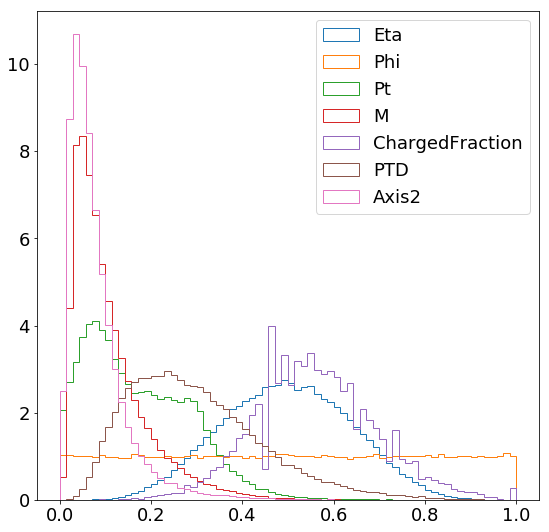

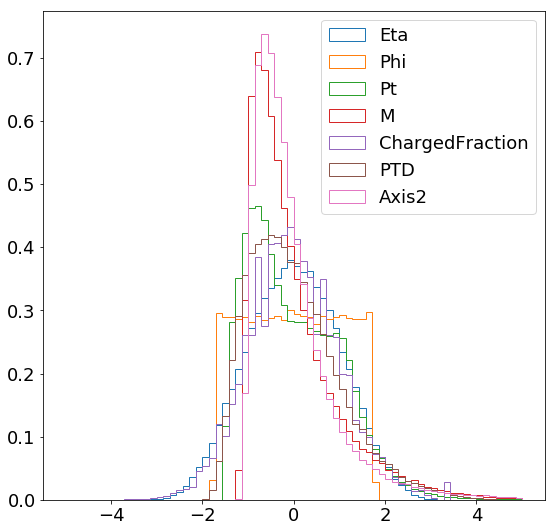

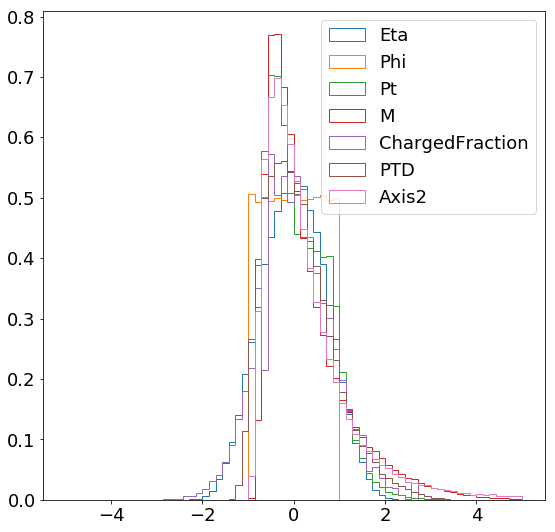

In [43]:
import matplotlib.pyplot as plt
main = e.qcd
bins = 70

for normer, rng in [
    ({'norm_type': 'MinMaxScaler', 'feature_range':(0,1)}, (0, 1)),
    ({'norm_type': 'StandardScaler'}, (-5., 5.)),
    ({'norm_type': 'RobustScaler'}, (-5., 5.))
]:
    
    var = main.cdrop('eflow *').norm(**normer)
#     rng = var.min().min(), var.max().max()
    plt.figure(figsize=(9,9))
    for colname in var:
        plt.hist(var[colname], bins=bins, range=rng, label=colname, histtype='step', normed=1)
    plt.legend()
    plt.show()

In [28]:
head = utils.get_repo_info()['head']

path = os.path.join(head, 'autoencode/scripts')
filepath = os.path.join(path, 'basic.py')

setup = os.path.join(head, 'autoencode/setup.sh')
cmd = 'python {}'.format(filepath)

condor_submit(cmd, path, 'TESTSUB', setup)

writing queue commands


In [19]:
def condor_submit(
    cmd,
    outputdir,
    name,
    setup_cmd = None,
):
    print("writing queue commands")
    run_script = os.path.join(outputdir, "{0}_submit.sh".format(name))
    run_submit = os.path.join(outputdir, "{0}_condor.submit".format(name))
    with open(run_script, 'w+') as f:
        f.write("#!/bin/bash\n")
        f.write("echo 'RUNNING NOW'\n")
        f.write("\n")
        # f.write(cmd + "\n")
        for line in cmd.split("; "):
            f.write("{0}\n".format(line))
    with open(run_submit, 'w+') as f:
        f.write("executable = {0}\n\n".format(run_script))
        f.write("universe = vanilla\n")
        f.write("getenv = True\n")
        f.write("log = {0}\n".format(os.path.join(outputdir, "{0}.log".format(name))))
        f.write("output = {0}\n".format(os.path.join(outputdir, "{0}.out".format(name))))
        f.write("error = {0}\n".format(os.path.join(outputdir, "{0}.err".format(name))))
        f.write("should_transfer_files = YES\n")
        f.write("when_to_transfer_output = ON_EXIT_OR_EVICT\n")
        f.write("transfer_input_files = {0}\n".format(run_script))
        # f.write("transfer_output_files = Data\n")
        f.write("request_cpus = 4\n")
        # f.write("request_disk = 20MB\n")
        # f.write("request_memory = 5MB\n\n")
        f.write("+JobFlavour = \"workday\"\n")
        f.write("queue\n")
    os.system("chmod +rwx {0}".format(run_script))
    condor_cmd = "condor_submit {0}; condor_q".format(run_submit)
    if setup_cmd is not None:
        condor_cmd = "{0}; ".format(setup_cmd) + condor_cmd
    os.system(condor_cmd)

In [2]:
d = data_container(
    ='data/signal/base_3/*.h5', 
    ttbar='data/ttbar_200pt/base_3/*.h5', 
    qcd='data/background/base_3/*.h5',
)

NameError: name 'data_container' is not defined

In [113]:
import keras
from keras.layers import Dense, Input, Concatenate
from keras.models import Model 
from keras.losses import mean_squared_error
from keras.regularizers import l1
from keras.utils import plot_model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, TerminateOnNaN, ModelCheckpoint
import autoencode.models as models 
keras.backend.clear_session()
eflow_bn = 1
hlf_bn = 4
eflow_shape = d.qcd.eflow.shape[1]
hlf_shape = d.qcd.hlf.shape[1]

eflow_input = Input(shape=(eflow_shape,), name='energyflow_inputs')
eflow_output = Dense(eflow_bn, activation='sigmoid', name='eflow_bottleneck')(Dense(40, activation='relu', name='eflow_dense1')(eflow_input))
eflow_recon = Dense(eflow_shape, activation='linear', name='eflow_reconstructed')(Dense(40, activation='relu', name='eflow_dense2')(eflow_output))

eflow_encoder = Model(inputs=eflow_input, outputs=eflow_output)
eflow_ae = Model(inputs=eflow_input, outputs=eflow_recon)
# eflow_ae.summary()

hlf_input = Input(shape=(hlf_shape + eflow_bn,), name='hlf_input')
interm1 = Dense(40, activation='relu', name='all_dense1')(hlf_input)
interm2 = Dense(40, activation='relu', name='all_dense2')(interm1)
neck = Dense(hlf_bn, activation='relu', name='all_bottleneck')(interm2)
interm3 = Dense(40, activation='relu', name='all_dense3')(neck)
interm4 = Dense(40, activation='relu', name='all_dense4')(interm3)
hlf_output = Dense(hlf_shape + eflow_bn, activation='linear', name='all_output')(interm4)

model = Model(inputs=[hlf_input], outputs=[hlf_output])

eflow_ae.compile(
    loss='mae',
    optimizer='adam'
)

model.compile(
    loss=['mse'],
    optimizer='adam'
)
# plot_model(model, show_shapes=1, show_layer_names=1

In [114]:
seed = 5

eflow_train, eflow_test = d.qcd.eflow.train_test_split(0.2, random_state=seed)

eflow_ae.fit(
    x=eflow_train.values,
    y=eflow_train.values,
    validation_data=[eflow_test.values, eflow_test.values],
    batch_size=64,
    epochs=100,
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=10, verbose=0),
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=0),
        TerminateOnNaN(),
#         ModelCheckpoint('test.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True, mode='min')
    ]
)

Train on 82732 samples, validate on 20684 samples
Epoch 1/100
82732/82732 [==============================] - 3s 35us/step - loss: 0.0073 - val_loss: 0.0039
Epoch 2/100
82732/82732 [==============================] - 3s 31us/step - loss: 0.0035 - val_loss: 0.0034
Epoch 3/100
82732/82732 [==============================] - 3s 30us/step - loss: 0.0033 - val_loss: 0.0033
Epoch 4/100
82732/82732 [==============================] - 2s 30us/step - loss: 0.0032 - val_loss: 0.0033
Epoch 5/100
82732/82732 [==============================] - 3s 32us/step - loss: 0.0032 - val_loss: 0.0032
Epoch 6/100
82732/82732 [==============================] - 3s 31us/step - loss: 0.0032 - val_loss: 0.0032
Epoch 7/100
82732/82732 [==============================] - 3s 32us/step - loss: 0.0032 - val_loss: 0.0032
Epoch 8/100
82732/82732 [==============================] - 3s 31us/step - loss: 0.0032 - val_loss: 0.0032
Epoch 9/100
82732/82732 [==============================] - 3s 30us/step - loss: 0.0032 - val_loss: 0.0

In [122]:
# d..recon = utils.data_table(eflow_ae.predict(d..eflow.values), headers=d..eflow.headers, name=' eflow recon')
# d.qcd.recon = utils.data_table(eflow_ae.predict(d.qcd.eflow.values), headers=d.qcd.eflow.headers, name='qcd eflow recon')

# d..nodes = utils.data_table(eflow_encoder.predict(d..eflow.values), name=' eflow nodes')
# d.qcd.nodes = utils.data_table(eflow_encoder.predict(d.qcd.eflow.values), name='qcd eflow nodes')

import numpy as np
qcd_err = utils.data_table(np.mean(np.square(d.qcd.recon.values - d.qcd.eflow.values), axis=1), name='qcd eflow mse')
signal_err = utils.data_table(np.mean(np.square(d..recon.values - d..eflow.values), axis=1), name=' eflow mse')


# _recon.plot(d..eflow)
# qcd_recon.plot(d..eflow)

# d.qcd.nodes.plot(d..nodes, normed=1)


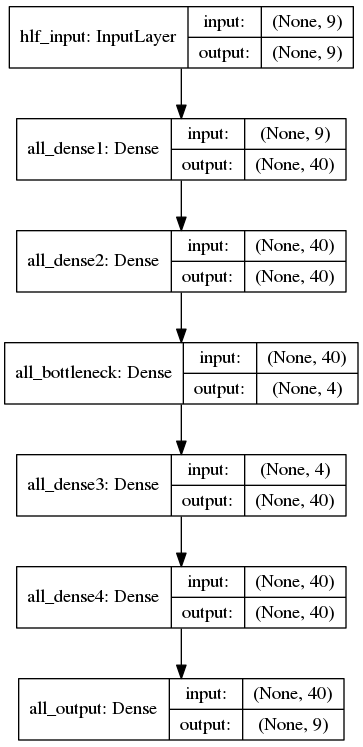

In [85]:
from IPython.display import Image
Image(filename='model.png') 

In [14]:
class data_element:
    def __init__(
        self,
        path,
        name,
        *args,
        **kwargs
    ):
        ret = utils.load_all_data(path, name=name, *args, **kwargs)
        
        setattr(self, 'data', ret[0])
        setattr(self, 'jet', ret[1])
        setattr(self, 'event', ret[2])
        setattr(self, 'flavor', ret[3])
        self.eflow = self.data.cfilter('eflow*')
        self.hlf = self.data.cdrop('eflow*')    
    def __getitem__(
        self,
        key
    ):
        return getattr(self, key)
    
class data_container:
    def __init__(
        self,
        *args,
        **kwargs
    ):
        for key, value in kwargs.items():
            setattr(self, key, data_element(value, key), *args)


In [ ]:
n